# Lab 2b: Model selection
## Dark matter
We'll use the MAGIC telescope dataset (http://www.openml.org/d/1120). The task is to classifying gamma rays, which consist of high-energy particles. When they hit our atmosphere, they produce chain reactions of other particles called 'showers'. However, similar showers are also produced by other particles (hadrons). We want to be able to detect which ones originate from gamma rays and which ones come from background radiation. To do this, the observed shower patterns are observed and converted into 10 numeric features. You need to detect whether these are gamma rays or background radiation. This is a key aspect of research into dark matter, which is believed to generate such gamma rays. If we can detect where they occur, we can build a map of the origins of gamma radiation, and locate where dark matter may occur in the observed universe. However, we'll first need to accurately detect these gamma rays first.

A quick visualization of the features is shown below. Note that this is not a time series, we just plot the instances in the order they occur in the dataset. The first 12500 or so are examples of signal (gamma), the final 6700 or so are background (hadrons).

In [9]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [2]:
# Download MAGIC Telescope data from OpenML. You can repeat this analysis with any other OpenML classification dataset.
magic = oml.datasets.get_dataset(1120)
X, y, _, _ = magic.get_data(target=magic.default_target_attribute, dataset_format='array');
attribute_names = [f.name for i,f in magic.features.items()][:-1][1:]

C:\Users\PC\AppData\Local\Temp\ipykernel_24900\2400162915.py:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  magic = oml.datasets.get_dataset(1120)
C:\Users\PC\AppData\Local\Temp\ipykernel_24900\2400162915.py:3: FutureWarning: Support for `dataset_format='array'` will be removed in 0.15,start using `dataset_format='dataframe' to ensure your code will continue to work. You can use the dataframe's `to_numpy` function to continue using numpy arrays.
  X, y, _, _ = magic.get_data(target=magic.default_target_attribute, dataset_format='array');


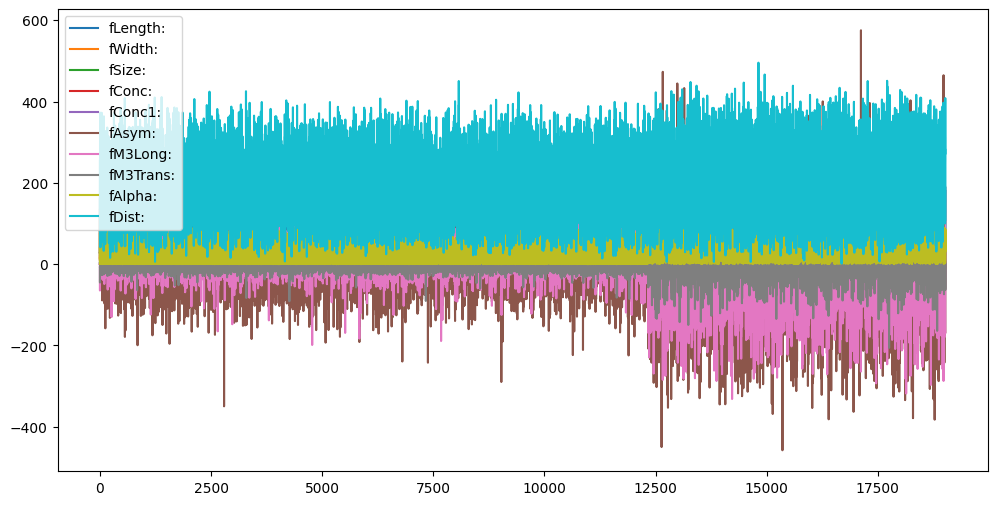

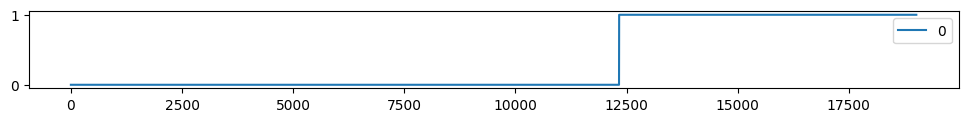

In [3]:
# Quick visualization of the features (top) and the target (bottom)
magic_df = pd.DataFrame(X, columns=attribute_names)
magic_df.plot(figsize=(12,6))
# Also plot the target: 1 = background, 0 = gamma
pd.DataFrame(y).plot(figsize=(12,1));

## Exercise 1: Metrics
Train and evaluate an SVM with RBF kernel (default hyperparameters) using a standard 25% holdout. Report the accuracy, precision, recall, F1 score, and area under the ROC curve (AUC).

Answer the following questions:
* How many of the detected gamma rays are actually real gamma rays?
* How many of all the gamma rays are we detecting?
* How many false positives and false negatives occur?

In [7]:
# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 14265
Testing set size: 4755


In [12]:
# Train the SVM with RBF kernel
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

print("Model trained successfully.")


Model trained successfully.


In [13]:
# Predict on the test set
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]

print("Predictions made successfully.")


Predictions made successfully.


In [14]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")


Accuracy: 0.8260778128286015
Precision: 0.8765765765765766
Recall: 0.5850871918220084
F1 Score: 0.7017670393076091
ROC AUC: 0.8759722878041912


In [15]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f"Confusion Matrix: \nTN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")



Confusion Matrix: 
TN: 2955, FP: 137, FN: 690, TP: 973


In [16]:
# Answer the questions
print(f"\n1. How many of the detected gamma rays are actually real gamma rays?")
print(f"   True Positives (TP): {tp}")

print(f"\n2. How many of all the gamma rays are we detecting?")
print(f"   Recall: {recall} (which means we detected {recall*100}% of the actual gamma rays)")

print(f"\n3. How many false positives and false negatives occur?")
print(f"   False Positives (FP): {fp}")
print(f"   False Negatives (FN): {fn}")


1. How many of the detected gamma rays are actually real gamma rays?
   True Positives (TP): 973

2. How many of all the gamma rays are we detecting?
   Recall: 0.5850871918220084 (which means we detected 58.50871918220084% of the actual gamma rays)

3. How many false positives and false negatives occur?
   False Positives (FP): 137
   False Negatives (FN): 690


## Exercise 2: Preprocessing
SVMs require scaling to perform well. For now, use the following code to scale the data (we'll get back to this in the lab about preprocessing and pipelines). Repeat question 2 on the scaled data. Have the results improved?

In [17]:
from sklearn.preprocessing import StandardScaler
# Important here is to fit the scaler on the training data alone
# Then, use it to scale both the training set and test set
# This assumes that you named your training set X_train. Adapt if needed.
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

In [18]:
# Train the SVM with RBF kernel on the scaled data
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(Xs_train, y_train)

print("Model trained on scaled data successfully.")


Model trained on scaled data successfully.


In [19]:
# Predict on the scaled test set
y_pred = svm_model.predict(Xs_test)
y_proba = svm_model.predict_proba(Xs_test)[:, 1]

print("Predictions on scaled data made successfully.")


Predictions on scaled data made successfully.


In [20]:
# Calculate the metrics on scaled data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")


Accuracy: 0.8694006309148264
Precision: 0.8983180428134556
Recall: 0.7065544197233915
F1 Score: 0.7909794681925277
ROC AUC: 0.9162498376116979


In [21]:
# Confusion matrix on scaled data
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(f"Confusion Matrix: \nTN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")


Confusion Matrix: 
TN: 2959, FP: 133, FN: 488, TP: 1175


In [22]:
# Answer the questions
print(f"\n1. How many of the detected gamma rays are actually real gamma rays?")
print(f"   True Positives (TP): {tp}")

print(f"\n2. How many of all the gamma rays are we detecting?")
print(f"   Recall: {recall} (which means we detected {recall*100}% of the actual gamma rays)")

print(f"\n3. How many false positives and false negatives occur?")
print(f"   False Positives (FP): {fp}")
print(f"   False Negatives (FN): {fn}")


1. How many of the detected gamma rays are actually real gamma rays?
   True Positives (TP): 1175

2. How many of all the gamma rays are we detecting?
   Recall: 0.7065544197233915 (which means we detected 70.65544197233915% of the actual gamma rays)

3. How many false positives and false negatives occur?
   False Positives (FP): 133
   False Negatives (FN): 488


**Comparison:**

True Positives: Increased from 973 to 1175.

Recall: Improved from 58.51% to 70.66%.

False Positives: Slightly decreased from 137 to 133.

False Negatives: Decreased from 690 to 488.

## Exercise 3: Hyperparameter optimization
Use 50 iterations of random search to tune the $C$ and $gamma$ hyperparameters on the scaled training data. Vary both on a log scale (e.g. from 2^-12 to 2^12). Optimize on AUC and use 3 cross-validation (CV) folds for the inner CV to estimate performance. For the outer loop, just use the train-test split you used before (hence, no nested CV). Report the best hyperparameters and the corresponding AUC score. Is it better than the default? Finally, use them to evaluate the model on the held-out test set, for all 5 metrics we used before.

Extra challenge: plot the samples used by the random search ($C$ vs $gamma$)

Note: The reason we don't use a nested CV just yet is because we would need to rebuild the scaled training and test set multiple times. This is tedious, unless we use pipelines, which we'll cover in a future lab.

In [24]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Ensure you have scaled training data from previous steps
# scaler = StandardScaler().fit(X_train)
# Xs_train = scaler.transform(X_train)
# Xs_test = scaler.transform(X_test)


In [25]:
# Define the parameter grid
param_dist = {
    'C': uniform(loc=1e-2, scale=1e2),  # C values from 0.01 to 10
    'gamma': uniform(loc=1e-4, scale=1e1)  # gamma values from 0.0001 to 10
}

# Create the random search model
svm = SVC(kernel='rbf', probability=True)

# Perform the random search
random_search = RandomizedSearchCV(
    svm,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    random_state=42
)

# Fit the random search model
random_search.fit(Xs_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
best_auc = random_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best AUC from cross-validation: {best_auc}")


Best hyperparameters: {'C': 2.5519126744095186, 'gamma': 1.0790142699330445}
Best AUC from cross-validation: 0.9037462040447114


In [27]:
# Train the SVM with the best hyperparameters on the full training set
best_svm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], probability=True)
best_svm.fit(Xs_train, y_train)

# Predict on the test set
y_pred_best = best_svm.predict(Xs_test)
y_proba_best = best_svm.predict_proba(Xs_test)[:, 1]

# Calculate the metrics on the test set
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_proba_best)

print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1 Score: {f1_best}")
print(f"ROC AUC: {roc_auc_best}")

# Confusion matrix on scaled data with best hyperparameters
tn_best, fp_best, fn_best, tp_best = confusion_matrix(y_test, y_pred_best).ravel()

print(f"Confusion Matrix: \nTN: {tn_best}, FP: {fp_best}, FN: {fn_best}, TP: {tp_best}")

# Answer the questions
print(f"\n1. How many of the detected gamma rays are actually real gamma rays?")
print(f"   True Positives (TP): {tp_best}")

print(f"\n2. How many of all the gamma rays are we detecting?")
print(f"   Recall: {recall_best} (which means we detected {recall_best*100}% of the actual gamma rays)")

print(f"\n3. How many false positives and false negatives occur?")
print(f"   False Positives (FP): {fp_best}")
print(f"   False Negatives (FN): {fn_best}")


Accuracy: 0.864143007360673
Precision: 0.8568421052631578
Recall: 0.7342152736019242
F1 Score: 0.7908031088082902
ROC AUC: 0.9071967383871944
Confusion Matrix: 
TN: 2888, FP: 204, FN: 442, TP: 1221

1. How many of the detected gamma rays are actually real gamma rays?
   True Positives (TP): 1221

2. How many of all the gamma rays are we detecting?
   Recall: 0.7342152736019242 (which means we detected 73.42152736019241% of the actual gamma rays)

3. How many false positives and false negatives occur?
   False Positives (FP): 204
   False Negatives (FN): 442


## Exercise 4: Threshold calibration
First, plot the Precision-Recall curve for the SVM using the default parameters on the scaled data. Then, calibrate the threshold to find a solution that yields better recall without sacrificing too much precision.

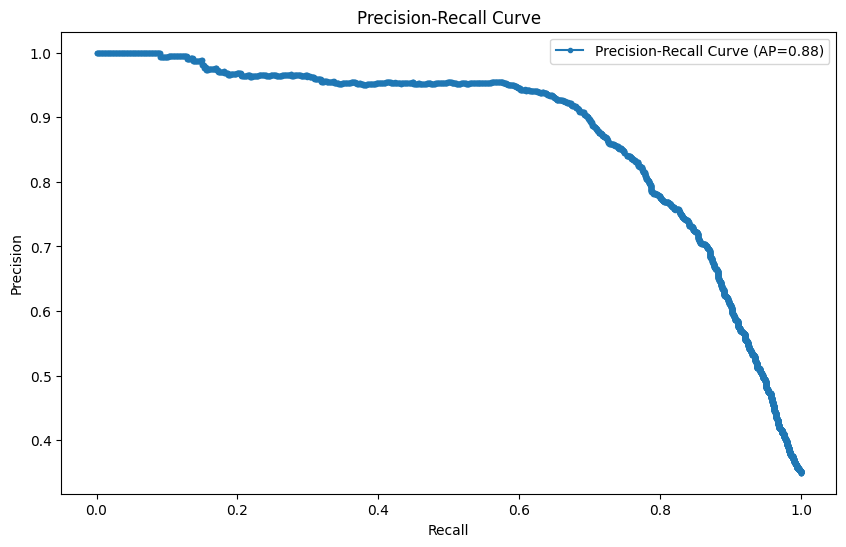

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get the predicted probabilities for the positive class
y_scores = best_svm.predict_proba(Xs_test)[:, 1]

# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall Curve (AP={average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [29]:
# Find the best threshold for maximizing the F1 score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

print(f"Best threshold for maximum F1 score: {best_threshold}")

# Predict using the new threshold
y_pred_new_threshold = (y_scores >= best_threshold).astype(int)

# Calculate metrics with the new threshold
accuracy_new = accuracy_score(y_test, y_pred_new_threshold)
precision_new = precision_score(y_test, y_pred_new_threshold)
recall_new = recall_score(y_test, y_pred_new_threshold)
f1_new = f1_score(y_test, y_pred_new_threshold)
roc_auc_new = roc_auc_score(y_test, y_pred_new_threshold)

print(f"Accuracy: {accuracy_new}")
print(f"Precision: {precision_new}")
print(f"Recall: {recall_new}")
print(f"F1 Score: {f1_new}")
print(f"ROC AUC: {roc_auc_new}")

# Confusion matrix with the new threshold
tn_new, fp_new, fn_new, tp_new = confusion_matrix(y_test, y_pred_new_threshold).ravel()

print(f"Confusion Matrix: \nTN: {tn_new}, FP: {fp_new}, FN: {fn_new}, TP: {tp_new}")

Best threshold for maximum F1 score: 0.46145180696912175
Accuracy: 0.8643533123028391
Precision: 0.8313802083333334
Recall: 0.7678893565844859
F1 Score: 0.798374492028759
ROC AUC: 0.842062401448776
Confusion Matrix: 
TN: 2833, FP: 259, FN: 386, TP: 1277


## Exercise 5: Cost function
Assume that a false negative is twice as bad (costly) than a false positive. I.e. we would rather waste time checking gamma ray sources that are not real, than missing an interesting gamma ray source. Use ROC analysis to find the optimal threshold under this assumption.

Finally, let the model make predictions using the optimal threshold and report all 5 scores. Is recall better now? Did we lose a lot of precision?

In [31]:
def cost_function(fp, fn):
    return fp + 2 * fn


In [32]:
# Calculate costs for different thresholds
costs = []
for threshold in thresholds:
    y_pred_threshold = (y_scores >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    cost = cost_function(fp, fn)
    costs.append(cost)

# Find the threshold with the minimum cost
min_cost_index = np.argmin(costs)
optimal_threshold = thresholds[min_cost_index]

print(f"Optimal threshold to minimize cost: {optimal_threshold}")


Optimal threshold to minimize cost: 0.2914859338245304


In [33]:
# Predict using the optimal threshold
y_pred_optimal_threshold = (y_scores >= optimal_threshold).astype(int)

# Calculate metrics with the optimal threshold
accuracy_optimal = accuracy_score(y_test, y_pred_optimal_threshold)
precision_optimal = precision_score(y_test, y_pred_optimal_threshold)
recall_optimal = recall_score(y_test, y_pred_optimal_threshold)
f1_optimal = f1_score(y_test, y_pred_optimal_threshold)
roc_auc_optimal = roc_auc_score(y_test, y_proba_best)

print(f"Accuracy: {accuracy_optimal}")
print(f"Precision: {precision_optimal}")
print(f"Recall: {recall_optimal}")
print(f"F1 Score: {f1_optimal}")
print(f"ROC AUC: {roc_auc_optimal}")

# Confusion matrix with the optimal threshold
tn_optimal, fp_optimal, fn_optimal, tp_optimal = confusion_matrix(y_test, y_pred_optimal_threshold).ravel()

print(f"Confusion Matrix: \nTN: {tn_optimal}, FP: {fp_optimal}, FN: {fn_optimal}, TP: {tp_optimal}")

# Summary
print(f"\n1. How many of the detected gamma rays are actually real gamma rays?")
print(f"   True Positives (TP): {tp_optimal}")

print(f"\n2. How many of all the gamma rays are we detecting?")
print(f"   Recall: {recall_optimal} (which means we detected {recall_optimal*100}% of the actual gamma rays)")

print(f"\n3. How many false positives and false negatives occur?")
print(f"   False Positives (FP): {fp_optimal}")
print(f"   False Negatives (FN): {fn_optimal}")


Accuracy: 0.8466876971608833
Precision: 0.7574421168687983
Recall: 0.8262176788935659
F1 Score: 0.7903364969801553
ROC AUC: 0.9071967383871944
Confusion Matrix: 
TN: 2652, FP: 440, FN: 289, TP: 1374

1. How many of the detected gamma rays are actually real gamma rays?
   True Positives (TP): 1374

2. How many of all the gamma rays are we detecting?
   Recall: 0.8262176788935659 (which means we detected 82.62176788935659% of the actual gamma rays)

3. How many false positives and false negatives occur?
   False Positives (FP): 440
   False Negatives (FN): 289
